In [11]:
#importing libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.neighbors import NearestNeighbors
import seaborn as seabornInstance
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
from matplotlib import colors as clr
import matplotlib.cm as cm
%matplotlib inline

In [12]:
df=pd.read_csv('knotty_data.csv')

In [22]:
cmap = matplotlib.cm.get_cmap('Spectral')
#color = ['red','green','blue','black', 'yellow', 'gray', 'pink', 'orange']
color = np.linspace(0.0, 1.0, 1000)
rgba = cmap(color)

/opt/conda/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


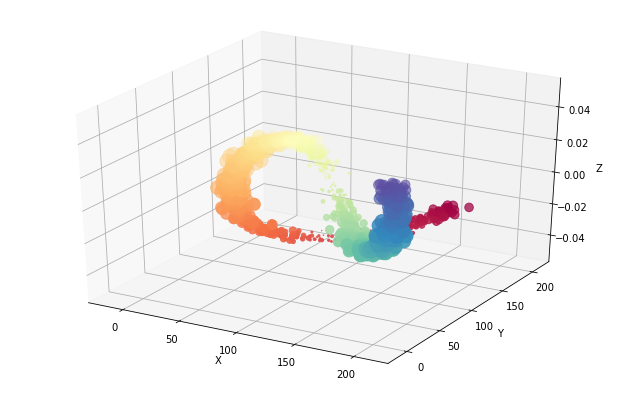

In [23]:
fig = plt.figure(figsize=(11, 7))
ax = fig.add_subplot(111, projection='3d')

plt.scatter(df.x, df.y, df.z,c=color,cmap=cmap)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.savefig('scatter.png')
plt.show()


In [24]:
color=df.iloc[:,0]
data=df.iloc[:,1:]

In [25]:
minima = min(color)
maxima = max(color)

norm = clr.Normalize(vmin=minima, vmax=maxima, clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=cmap)

#for v in color:
 #   print(mapper.to_rgba(v))

In [26]:
#Standardization
mm_scaler = preprocessing.MinMaxScaler()
x = mm_scaler.fit_transform(df)


In [27]:
cols = ['feature'+str(i) for i in range(x.shape[1])]
normalised = pd.DataFrame(x,columns=cols)
normalised

,feature0,feature1,feature2,feature3
0,0.000000,0.943353,0.542366,0.395982
1,0.001001,0.946212,0.582604,0.445377
2,0.002002,1.000000,0.593515,0.376579
3,0.003003,0.929505,0.576561,0.424926
4,0.004004,0.943595,0.556463,0.381860
...,...,...,...,...
995,0.995996,0.672205,0.691680,0.438791
996,0.996997,0.642197,0.665662,0.400094
997,0.997998,0.626654,0.665762,0.441215
998,0.998999,0.637570,0.661281,0.420877


In [28]:
pca = PCA(n_components=1)
PCA_ = pca.fit_transform(normalised)
PCA_.shape
pc1 = PCA_[:,0]
pc1.shape

(1000,)

In [29]:
n = np.arange(0, 1000).reshape((1000,))

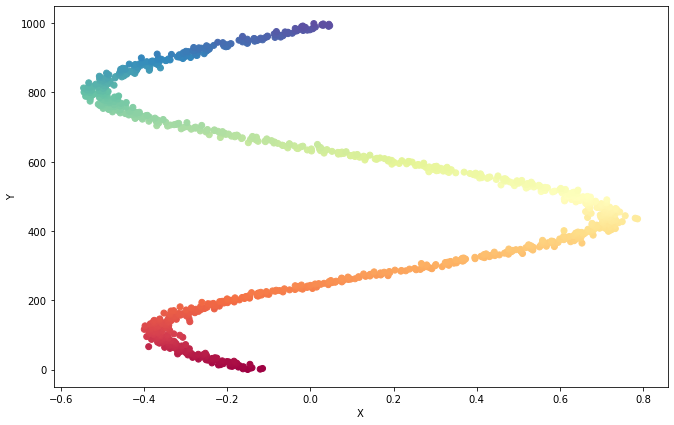

In [30]:
fig = plt.figure(figsize=(11, 7))
ax = fig.add_subplot(111)
plt.scatter(pc1,n,c=np.array(color).reshape(1000,),cmap=cmap,marker='o')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.savefig('scatter_1.png')
plt.show()

In [31]:
import seaborn as sns
n=np.zeros(1000)

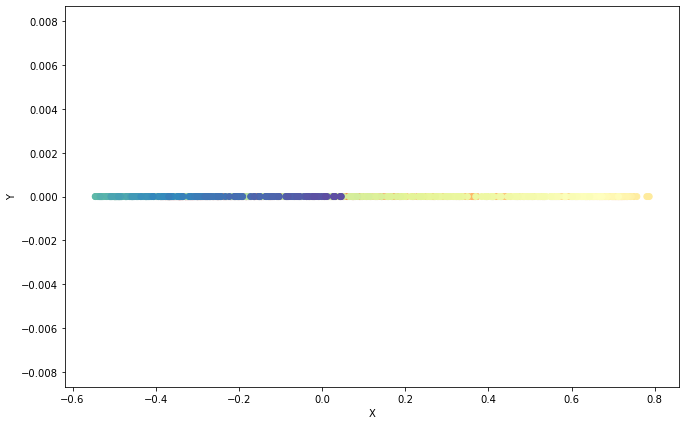

In [32]:
fig = plt.figure(figsize=(11, 7))
ax = fig.add_subplot(111)
plt.scatter(pc1,n,marker='o',c=np.array(color).reshape(1000,),cmap=cmap)
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.savefig('scatter_2.png')
plt.show()

In [33]:
xxxx=data.iloc[[1]]
xxxx

,x,y,z
1,199.61218,118.40014,88.63306


In [34]:
neigh = NearestNeighbors(n_neighbors=10)
neigh.fit(data)
print(neigh.kneighbors(xxxx,return_distance=False))
A = neigh.kneighbors_graph(data)

neigh2 = NearestNeighbors(n_neighbors=10)
neigh2.fit(pc1.reshape(-1, 1))
print(neigh2.kneighbors(pc1[1].reshape(1, -1),return_distance=False))

[[ 1  3  5  0  4  8  6  2 10  7]]
[[  1 957 223 953 216 215 219 221 212 659]]


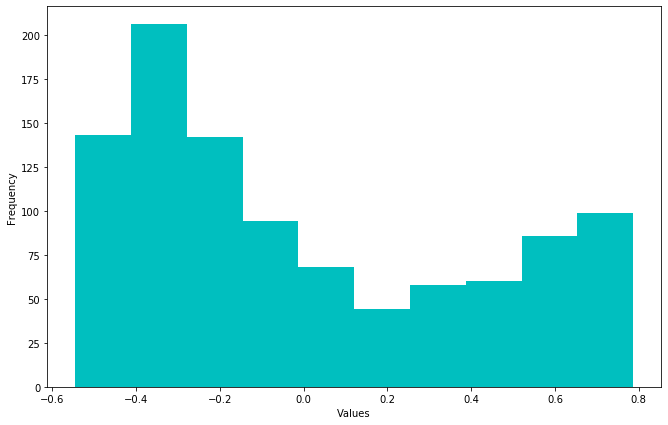

In [35]:
fig = plt.figure(figsize=(11, 7))
ax = fig.add_subplot(111)
plt.hist(pc1,bins=10,color='c')
ax.set_xlabel('Values')
ax.set_ylabel('Frequency')
plt.savefig('hist.png')
plt.show()

In [36]:
from sklearn.manifold import MDS
from sklearn.manifold import Isomap

In [37]:
embedding = MDS(n_components=1,metric= False)
X_transformed = embedding.fit_transform(data)
print('Hello',X_transformed.shape)
mdds = X_transformed[:,0]
print('Bye',mdds.shape)

Hello (1000, 1)
Bye (1000,)


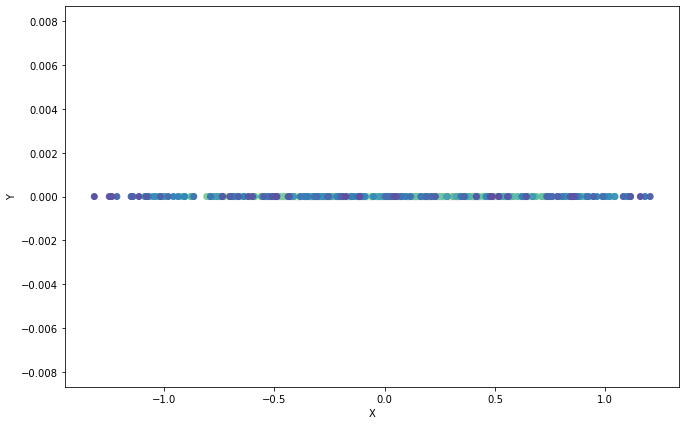

In [38]:
fig = plt.figure(figsize=(11, 7))
ax = fig.add_subplot(111)
plt.scatter(mdds,n,c=np.array(color).reshape(1000,),cmap=cmap)
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.savefig('mdds.png')
plt.show()

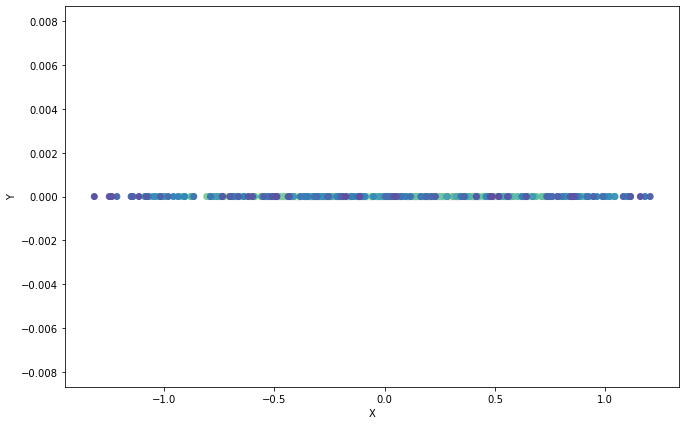

In [39]:
fig = plt.figure(figsize=(11, 7))
ax = fig.add_subplot(111)
plt.scatter(mdds,n,c=np.array(color).reshape(1000,),cmap=cmap)
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.savefig('mdsPlt.png')
plt.show()

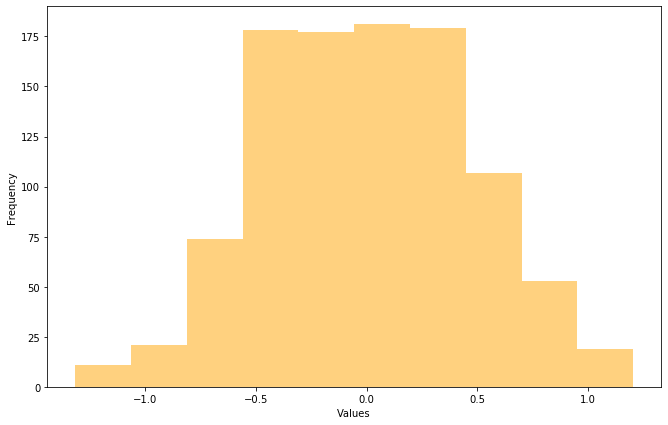

In [40]:
fig = plt.figure(figsize=(11, 7))
ax = fig.add_subplot(111)
plt.hist(mdds, 10, facecolor='orange', alpha=0.5)
plt.xlabel("Values")
plt.ylabel("Frequency")

plt.savefig('mdshist.png')
plt.show()

In [41]:
neigh = NearestNeighbors(n_neighbors=15)
neigh.fit(data)
print(neigh.kneighbors(xxxx,return_distance=False))
A = neigh.kneighbors_graph(data)


neigh2 = NearestNeighbors(n_neighbors=15)
neigh2.fit(mdds.reshape(-1, 1))
print(neigh2.kneighbors(mdds[1].reshape(1, -1),return_distance=False))
embedding.stress_

[[ 1  3  5  0  4  8  6  2 10  7  9 14 12 15 16]]
[[  1 997  38  12 140  58 188 814  75 445 665 947  93 657 654]]


42370.67497520445

In [42]:
embedding2 = Isomap(n_components=1)
Xx_transformed = embedding2.fit_transform(data)

iso = Xx_transformed[:,0]
print(iso.shape)
n = np.arange(0, 1000).reshape((1000,))

(1000,)


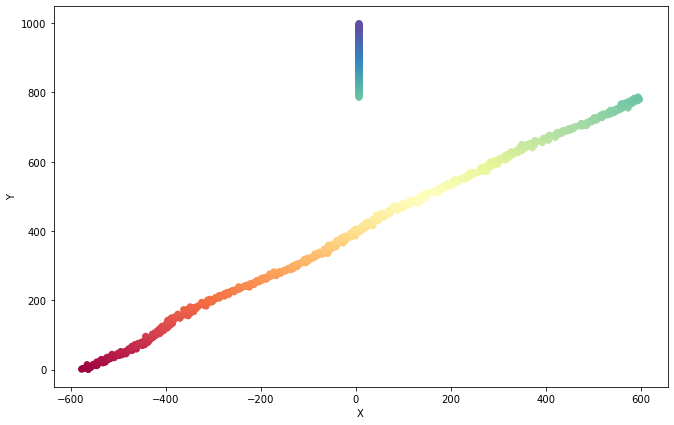

In [43]:
fig = plt.figure(figsize=(11, 7))
ax = fig.add_subplot(111)
plt.scatter(iso,n,c=np.array(color).reshape(1000,),cmap=cmap)
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.savefig('iso.png')
plt.show()

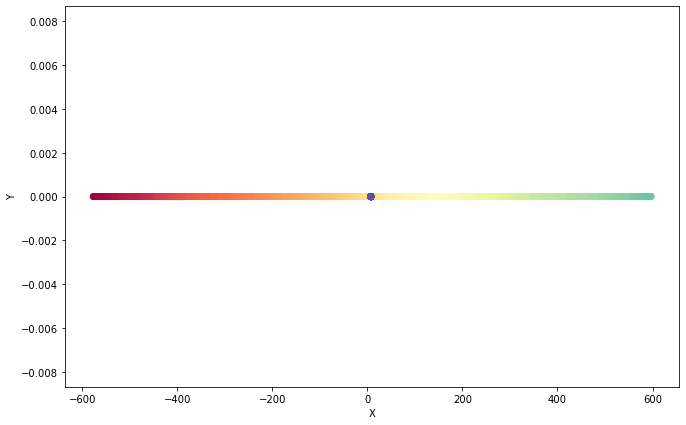

In [44]:
n = np.zeros(1000)
fig = plt.figure(figsize=(11, 7))
ax = fig.add_subplot(111)
plt.scatter(iso,n,c=np.array(color).reshape(1000,),cmap=cmap)
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.savefig('isoPlt.png')
plt.show()

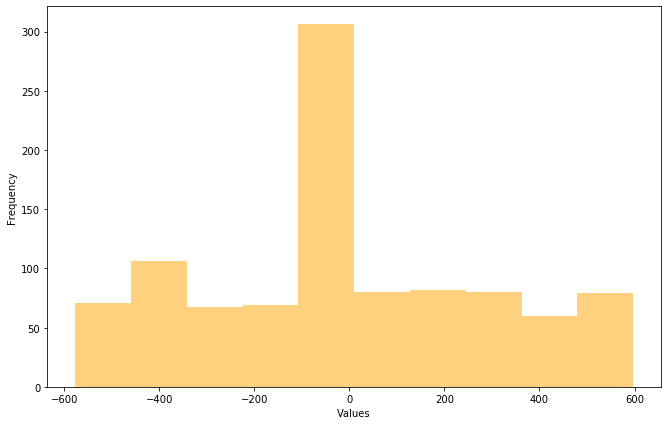

In [45]:
fig = plt.figure(figsize=(11, 7))
ax = fig.add_subplot(111)
plt.hist(iso, 10, facecolor='orange', alpha=0.5)
plt.xlabel("Values")
plt.ylabel("Frequency")

plt.savefig('isohist.png')
plt.show()

In [46]:

neigh = NearestNeighbors(n_neighbors=15)
neigh.fit(data)
print(neigh.kneighbors(xxxx,return_distance=False))
A = neigh.kneighbors_graph(data)

[[ 1  3  5  0  4  8  6  2 10  7  9 14 12 15 16]]


In [47]:
neigh2 = NearestNeighbors(n_neighbors=15)
neigh2.fit(iso.reshape(-1, 1))
print(neigh2.kneighbors(iso[1].reshape(1, -1),return_distance=False))


[[ 1  2  3  5 14  7  8  4 10  0  6  9 15 12 16]]
